<a href="https://colab.research.google.com/github/ananyas168/NLP_/blob/main/unsupervised_adjective_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df = pd.read_excel('/content/assignment3_data.xlsx',header=None)
df =df.drop(0)
df

,0
1,"Intelligence, integrity, decisiveness"
2,"Honesty, passion, determination, teamwork"
3,U have to be well qualified
4,"Honesty, good work ethic, understanding of sys..."
5,Common sense
6,I'm not sure. There are a lot of qualities a p...
7,"Confident, eloquent, logical, wise, friendly, ..."
8,"Smart, good negotiator, appeals to the whole c..."
9,Honesty and dedication
10,Good Character


In [ ]:
output = pd.read_excel('/content/assignment3_gold_labels.xlsx')
output

,Labels Generated by Experts
0,confident
1,determination
2,diplomacy
3,honesty
4,intelligence/knowledge
5,leadership
6,long term vision
7,political skills
8,relate to diverse groups
9,humble


In [ ]:
import csv,sys
from sklearn.ensemble import RandomForestClassifier
from nltk.corpus import stopwords
import re
from bs4 import BeautifulSoup
import logging
import pandas as pd
import numpy as np
from numpy import random
import gensim
import nltk
from nltk.corpus import wordnet
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import GridSearchCV 
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold, train_test_split 
from sklearn.metrics import confusion_matrix,accuracy_score, precision_score, recall_score, f1_score
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.zip.
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown.zip.
[nltk_data]    | Downloading package brown_tei to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown_tei.zip.
[nltk_data]    | Downloading package cess_cat to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cess_cat.zip.
[nltk_data]    | Downloading package cess_esp to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cess_esp.zip.
[nltk_data]    | Downloading package chat80 to /root/nltk_data...
[nltk_data]    |   Unzipp

True

In [ ]:
analyzer = CountVectorizer().build_analyzer()

def stemmed_words(doc):
  return (PorterStemmer().stem(w) for w in analyzer(doc))

def lemmatized_words(doc):
  return (WordNetLemmatizer().lemmatize(w) for w in analyzer(doc))


In [ ]:
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))

def clean_text(text, type):
    """
        text: a string
        
        return: modified initial string
    """
    # text = BeautifulSoup(text, "lxml").text # HTML decoding
    # text = text.lower() # lowercase text
    # text = REPLACE_BY_SPACE_RE.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text
    # text = BAD_SYMBOLS_RE.sub('', text) # delete symbols which are in BAD_SYMBOLS_RE from text
    #text = ' '.join(word for word in text.split() if word not in STOPWORDS) # delete stopwors from text
    #text = ' '.join(word for word in analyzer(text) if word not in STOPWORDS) # delete stopwors from text
    #text = ' '.join(WordNetLemmatizer().lemmatize(w) for w in analyzer(text))
    if type == 1:
      text = ' '.join(word for word in text.split() if word not in STOPWORDS) # delete stopwors from text
    elif type == 2:
      #print('only_stop')
      text = ' '.join(word for word in analyzer(text) if word not in STOPWORDS)
    
    elif type == 3:
      text = ' '.join(PorterStemmer().stem(w) for w in analyzer(text))
    elif type == 4:
      text = ' '.join(WordNetLemmatizer().lemmatize(w) for w in analyzer(text))
    elif type == 5:
      text = ' '.join(word for word in analyzer(text) if word not in STOPWORDS)
      text = ' '.join(PorterStemmer().stem(w) for w in analyzer(text))
    elif type == 6:
      text = text.lower()
      text = ' '.join(word for word in analyzer(text) if word not in STOPWORDS)
      text = ' '.join(WordNetLemmatizer().lemmatize(w) for w in analyzer(text))
      #text = ' '.join(PorterStemmer().stem(w) for w in analyzer(text))
    return text

In [ ]:
df[0] = df[0].apply(clean_text, args= (6,))

In [ ]:
df_word_list = df[0].to_numpy()
df_word_list
word_list = []
for i in range(len(df_word_list)):
  #print(i)
  tokens = nltk.word_tokenize(df_word_list[i])
  #print(tokens)
  for t in tokens: 
    word_list.append(t)


#tokens = nltk.word_tokenize(df_word_list[0])
#word_list
print('word_list',len(word_list))

tags = nltk.pos_tag(word_list)
nouns = [word for word,pos in tags if (pos == 'NN' or pos == 'NNP' or pos == 'NNS' or pos == 'NNPS')]
adjective = [word for word,pos in tags if (pos == 'JJ' or pos == 'JJS' or pos == 'JJR')]
print('nouns', nouns, len(nouns))
print('adjective', adjective, len(adjective))
noun__adj=  [word for word,pos in tags if (pos == 'NN' or pos == 'NNP' or pos == 'NNS' or pos == 'NNPS'or pos == 'JJ' or pos == 'JJS' or pos == 'JJR')]
print('noun_adjective', noun__adj, len(noun__adj))




word_list 196
nouns ['intelligence', 'integrity', 'decisiveness', 'honesty', 'passion', 'determination', 'teamwork', 'honesty', 'work', 'system', 'sense', 'lot', 'quality', 'president', 'president', 'country', 'wise', 'negotiator', 'appeal', 'county', 'honesty', 'dedication', 'character', 'course', 'leader', 'someone', 'run', 'country', 'someone', 'decision', 'time', 'leadership', 'leadership', 'management', 'goal', 'achievement', 'term', 'commitment', 'people', 'inclusivity', 'leadership', 'integrity', 'honesty', 'honesty', 'promise', 'calm', 'deliberate', 'background', 'politics', 'president', 'compromise', 'selfless', 'level', 'mature', 'idea', 'unity', 'others', 'determination', 'willingness', 'work', 'others', 'integrity', 'intelligence', 'experience', 'kindness', 'equality', 'intelligence', 'morality', 'honesty', 'trustworthiness', 'problem', 'ability', 'genuine', 'care', 'others', 'leadership', 'compassion', 'bravery', 'intelligence', 'leadership', 'teamwork', 'leadership', 'exp

In [ ]:
# uniqueWords = [] 
# for i in noun__adj:
#       if not i in uniqueWords:
#           uniqueWords.append(i);
# len(uniqueWords)

# top_5_added_word=[]
# for word in uniqueWords:
#   top_5_added_word.append(word)
#   synonyms = []
#   for syn in wordnet.synsets(word):
#     for l in syn.lemmas():
#         synonyms.append(l.name())
#   #print(synonyms)

#   if len(synonyms)>5 :
#     for i in range(5):
#       top_5_added_word.append(synonyms[i].lower())
#   else:
#     for i in range(len(synonyms)):
#       top_5_added_word.append(synonyms[i].lower())
#   #exit()

# print(len(top_5_added_word))


# googlenews

In [ ]:
!wget -c "https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz"

--2022-02-15 13:40:51--  https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.217.134.160
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.217.134.160|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1647046227 (1.5G) [application/x-gzip]
Saving to: ‘GoogleNews-vectors-negative300.bin.gz’

GoogleNews-vectors- 100%[===================>]   1.53G  34.7MB/s    in 48s     

2022-02-15 13:41:39 (33.0 MB/s) - ‘GoogleNews-vectors-negative300.bin.gz’ saved [1647046227/1647046227]



In [ ]:
from gensim.models import KeyedVectors
filename = '/content/GoogleNews-vectors-negative300.bin.gz'
model = KeyedVectors.load_word2vec_format(filename, binary=True)
words = list(model.wv.vocab)
print(len(words))

3000000


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  after removing the cwd from sys.path.


In [ ]:
model['word','terpene', 'class'].shape, model['word']

((3, 300),
 array([ 3.59375000e-01,  4.15039062e-02,  9.03320312e-02,  5.46875000e-02,
        -1.47460938e-01,  4.76074219e-02, -8.49609375e-02, -2.04101562e-01,
         3.10546875e-01, -1.05590820e-02, -6.15234375e-02, -1.55273438e-01,
        -1.52343750e-01,  8.54492188e-02, -2.70996094e-02,  3.84765625e-01,
         4.78515625e-02,  2.58789062e-02,  4.49218750e-02, -2.79296875e-01,
         9.09423828e-03,  4.08203125e-01,  2.40234375e-01, -3.06640625e-01,
        -1.80664062e-01,  4.73632812e-02, -2.63671875e-01,  9.08203125e-02,
         1.37695312e-01, -7.20977783e-04,  2.67333984e-02,  1.92382812e-01,
        -2.29492188e-02,  9.70458984e-03, -7.37304688e-02,  4.29687500e-01,
        -7.93457031e-03,  1.06445312e-01,  2.80761719e-02, -2.29492188e-01,
        -1.91650391e-02, -2.36816406e-02,  3.51562500e-02,  1.71875000e-01,
        -1.12304688e-01,  6.25000000e-02, -1.69921875e-01,  1.29882812e-01,
        -1.54296875e-01,  1.58203125e-01, -7.76367188e-02,  1.78710938e-01,
 

In [ ]:
print(model)

In [ ]:
t=model.most_similar(positive=['terpene'], negative= [], topn=5 )
t

[('terpenes', 0.6838654279708862),
 ('monoterpenes', 0.6752954125404358),
 ('thymol', 0.6636612415313721),
 ('phosphite', 0.6630581617355347),
 ('limonene', 0.6613880395889282)]

In [ ]:
t[0][0]

'smart'

In [ ]:
t

[('smart', 0.6495277881622314),
 ('wheelchair_TAO', 0.6183764934539795),
 ('thoughtful', 0.5459740161895752),
 ('creationism_repackaged', 0.5402588844299316),
 ('perceptive', 0.5365097522735596)]

In [ ]:
words = list(model.wv.vocab)
print(len(words))

3000000


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """Entry point for launching an IPython kernel.


In [ ]:
uniqueWords = [] 
for i in noun__adj:
      if not i in uniqueWords:
          uniqueWords.append(i);
len(uniqueWords)

112

In [ ]:
list(uniqueWords)

In [ ]:
XX= model[uniqueWords]

In [ ]:
XX.shape

(112, 300)

In [ ]:
# dict1 = dict.fromkeys(uniqueWords,"")
# dict1['ability']='heloo'
# dict1

#word2vec and custom clustering

In [ ]:
# manual testing
#new_sentences= ['I am sure about my relationship expectation. It is as stated in my profile.']
dict1 = dict.fromkeys(uniqueWords, '')
for j in range(len(uniqueWords)):
    #new_sentences_embeddings =  embed(new_sentences).cpu().numpy()
    import scipy 
    #cosine similarity
    matrix_sim= np.zeros((112))
    for i in range(112):
      matrix_sim[i] = 1- scipy.spatial.distance.cosine(XX[i], XX[j])

    matrix_sim[matrix_sim<0.5]=0
    indices= np.nonzero(matrix_sim)
    indices
    list_sen = []
    sen= uniqueWords
    #print(sen)
    for i in range(len(indices[0])):
      #new=[]
      new= sen[indices[0][i]]
      
      #new.append(matrix_sim[indices[0][i]])
      list_sen.append(new)
      
    #list_sen

    # def Sort(sub_li):
    #     reverse = True
    #     return(sorted(sub_li, key = lambda x: x[],reverse=True))    
      
    # sorted= Sort(list_sen)
    #list_sen.remove(uniqueWords[j])
    dict1[uniqueWords[j]]= list_sen



dict1    

{'ability': ['able', 'willingness', 'ability'],
 'able': ['able', 'ability'],
 'achievement': ['achievement'],
 'agreeable': ['agreeable'],
 'appeal': ['appeal'],
 'approachable': ['polite', 'approachable'],
 'background': ['background'],
 'basic': ['basic'],
 'born': ['born'],
 'bravery': ['dedication', 'selfless', 'kindness', 'bravery'],
 'calm': ['calm'],
 'capable': ['capable'],
 'care': ['care'],
 'character': ['character'],
 'come': ['come'],
 'commitment': ['dedication', 'commitment', 'willingness'],
 'common': ['common'],
 'compassion': ['honesty',
  'empathy',
  'selfless',
  'kindness',
  'compassion',
  'humility'],
 'compromise': ['compromise'],
 'confident': ['confident', 'proud'],
 'constitution': ['constitution'],
 'country': ['country'],
 'county': ['county'],
 'course': ['course'],
 'crucial': ['crucial'],
 'decision': ['decision'],
 'decisiveness': ['decisiveness', 'honesty', 'humility'],
 'dedication': ['passion',
  'teamwork',
  'dedication',
  'commitment',
  'self

In [ ]:
clusters = []
wordsInCluster = []
synonyms = dict1 
for word1 in synonyms:
    #print(word1)
    noSynonym = 1
    for word2 in synonyms:
        if word1 != word2:
            # If the two words are synonyms
            #print(set(synonyms[word1]).intersection(set(synonyms[word2])))
            if set(synonyms[word1]).intersection(set(synonyms[word2])) != set():
                noSynonym = 0
                if word1 in wordsInCluster and word2 in wordsInCluster:
                    pass
                elif word1 in wordsInCluster:
                    for cluster in clusters:
                        if word1 in cluster:
                            cluster.append(word2)
                            wordsInCluster.append(word2)
                elif word2 in wordsInCluster:
                    for cluster in clusters:
                        if word2 in cluster:
                            cluster.append(word1)
                            wordsInCluster.append(word1)
                else:
                    clusters.append([word1,word2])
                    wordsInCluster.append(word1)
                    wordsInCluster.append(word2)

    if noSynonym == 1:
        clusters.append([word1])
        wordsInCluster.append(word1)

print(clusters)

[['intelligence'], ['integrity', 'decisiveness', 'honesty', 'empathy', 'honest', 'trustworthiness', 'compassion', 'trustworthy', 'humility', 'kindness', 'selfless'], ['passion', 'teamwork', 'dedication', 'commitment', 'bravery', 'determination', 'willingness', 'ability', 'skill', 'able'], ['qualified'], ['good', 'wise', 'nice', 'strong'], ['work'], ['understanding', 'experience', 'knowledge'], ['system'], ['progressive'], ['common'], ['sense'], ['sure'], ['lot'], ['quality'], ['president'], ['country'], ['confident', 'proud'], ['eloquent'], ['logical'], ['humble', 'polite', 'approachable'], ['smart'], ['negotiator'], ['appeal'], ['whole'], ['county'], ['character'], ['course'], ['leader', 'leadership'], ['someone'], ['run'], ['capable'], ['crucial'], ['decision'], ['time'], ['come'], ['management'], ['goal'], ['achievement'], ['long'], ['term'], ['levelheadedness'], ['people', 'others'], ['inclusivity', 'equality'], ['promise'], ['idiot'], ['peaceful'], ['calm'], ['deliberate'], ['back

In [ ]:
for cluster in clusters:
    if len(cluster)>=2:
      print(cluster)

['integrity', 'decisiveness', 'honesty', 'empathy', 'honest', 'trustworthiness', 'compassion', 'trustworthy', 'humility', 'kindness', 'selfless']
['passion', 'teamwork', 'dedication', 'commitment', 'bravery', 'determination', 'willingness', 'ability', 'skill', 'able']
['good', 'wise', 'nice', 'strong']
['understanding', 'experience', 'knowledge']
['confident', 'proud']
['humble', 'polite', 'approachable']
['leader', 'leadership']
['people', 'others']
['inclusivity', 'equality']
['politics', 'political']


In [ ]:
len(clusters)

81

# word2vec+wordnet+ custom clustering



In [ ]:
# manual testing
#new_sentences= ['I am sure about my relationship expectation. It is as stated in my profile.']
dict1 = dict.fromkeys(uniqueWords, '')
for j in range(len(uniqueWords)):
    #new_sentences_embeddings =  embed(new_sentences).cpu().numpy()
    import scipy 
    #cosine similarity
    matrix_sim= np.zeros((112))
    for i in range(112):
      matrix_sim[i] = 1- scipy.spatial.distance.cosine(XX[i], XX[j])

    matrix_sim[matrix_sim<0.5]=0
    indices= np.nonzero(matrix_sim)
    indices
    list_sen = []
    sen= uniqueWords
    #print(sen)
    for i in range(len(indices[0])):
      #new=[]
      new= sen[indices[0][i]]
      
      #new.append(matrix_sim[indices[0][i]])
      list_sen.append(new)
      
    synonyms = []
    for syn in wordnet.synsets(uniqueWords[j]):
      for l in syn.lemmas():
          synonyms.append(l.name())
    #print(synonyms)

    if len(synonyms)>5 :
      for i in range(5):
        list_sen.append(synonyms[i].lower())
    else:
      for i in range(len(synonyms)):
        list_sen.append(synonyms[i].lower())
    
    
    #list_sen

    # def Sort(sub_li):
    #     reverse = True
    #     return(sorted(sub_li, key = lambda x: x[],reverse=True))    
      
    # sorted= Sort(list_sen)
    #list_sen.remove(uniqueWords[j])
    dict1[uniqueWords[j]]= list_sen



dict1    

{'ability': ['able', 'willingness', 'ability', 'ability', 'ability', 'power'],
 'able': ['able', 'ability', 'able', 'able', 'capable', 'able', 'able'],
 'achievement': ['achievement', 'accomplishment', 'achievement'],
 'agreeable': ['agreeable',
  'agreeable',
  'accordant',
  'agreeable',
  'conformable',
  'consonant'],
 'appeal': ['appeal',
  'entreaty',
  'prayer',
  'appeal',
  'appeal',
  'appealingness'],
 'approachable': ['polite',
  'approachable',
  'accessible',
  'approachable',
  'approachable',
  'approachable',
  'reachable'],
 'background': ['background',
  'background',
  'background',
  'ground',
  'background',
  'background_knowledge'],
 'basic': ['basic', 'basic', 'basic', 'staple', 'basic', 'basic'],
 'born': ['born', 'born', 'max_born', 'bear', 'give_birth', 'deliver'],
 'bravery': ['dedication',
  'selfless',
  'kindness',
  'bravery',
  'courage',
  'courageousness',
  'bravery',
  'braveness',
  'fearlessness'],
 'calm': ['calm', 'composure', 'calm', 'calmness

In [ ]:
clusters = []
wordsInCluster = []
synonyms = dict1 
for word1 in synonyms:
    #print(word1)
    noSynonym = 1
    for word2 in synonyms:
        if word1 != word2:
            # If the two words are synonyms
            #print(set(synonyms[word1]).intersection(set(synonyms[word2])))
            if set(synonyms[word1]).intersection(set(synonyms[word2])) != set():
                noSynonym = 0
                if word1 in wordsInCluster and word2 in wordsInCluster:
                    pass
                elif word1 in wordsInCluster:
                    for cluster in clusters:
                        if word1 in cluster:
                            cluster.append(word2)
                            wordsInCluster.append(word2)
                elif word2 in wordsInCluster:
                    for cluster in clusters:
                        if word2 in cluster:
                            cluster.append(word1)
                            wordsInCluster.append(word1)
                else:
                    clusters.append([word1,word2])
                    wordsInCluster.append(word1)
                    wordsInCluster.append(word2)

    if noSynonym == 1:
        clusters.append([word1])
        wordsInCluster.append(word1)

print(clusters)

[['intelligence'], ['integrity', 'decisiveness', 'honesty', 'empathy', 'honest', 'unity', 'trustworthiness', 'compassion', 'trustworthy', 'humility', 'determination', 'decision', 'kindness', 'selfless', 'willingness', 'ability'], ['passion', 'teamwork', 'dedication', 'commitment', 'bravery', 'skill', 'achievement'], ['qualified'], ['good', 'wise', 'nice', 'strong'], ['work'], ['understanding', 'experience', 'knowledge'], ['system'], ['progressive'], ['common'], ['sense'], ['sure'], ['lot'], ['quality', 'character'], ['president'], ['country'], ['confident', 'proud'], ['eloquent'], ['logical'], ['humble', 'polite', 'approachable'], ['smart'], ['negotiator'], ['appeal'], ['whole'], ['county'], ['course'], ['leader', 'leadership'], ['someone'], ['run'], ['capable', 'able'], ['crucial'], ['time'], ['come'], ['management'], ['goal'], ['long'], ['term'], ['levelheadedness'], ['people', 'others'], ['inclusivity', 'equality'], ['promise'], ['idiot'], ['peaceful'], ['calm'], ['deliberate'], ['b

In [ ]:
for cluster in clusters:
    if len(cluster)>=2:
      print(cluster)

['integrity', 'decisiveness', 'honesty', 'empathy', 'honest', 'unity', 'trustworthiness', 'compassion', 'trustworthy', 'humility', 'determination', 'decision', 'kindness', 'selfless', 'willingness', 'ability']
['passion', 'teamwork', 'dedication', 'commitment', 'bravery', 'skill', 'achievement']
['good', 'wise', 'nice', 'strong']
['understanding', 'experience', 'knowledge']
['quality', 'character']
['confident', 'proud']
['humble', 'polite', 'approachable']
['leader', 'leadership']
['capable', 'able']
['people', 'others']
['inclusivity', 'equality']
['politics', 'political']


In [ ]:
len(clusters)

77

#cluster

In [ ]:
#cluster

# word2 vec + k means clustering

In [ ]:

from nltk.cluster import KMeansClusterer
import nltk
NUM_CLUSTERS=81
kclusterer = KMeansClusterer(NUM_CLUSTERS, distance=nltk.cluster.util.cosine_distance, repeats=25)
assigned_clusters = kclusterer.cluster(XX, assign_clusters=True)
print(assigned_clusters)
# output: [0, 2, 1, 2, 2, 1, 2, 2, 0, 1, 0, 1, 2, 1, 2]

[44, 18, 66, 27, 25, 29, 1, 2, 65, 49, 11, 10, 55, 22, 64, 14, 28, 18, 78, 36, 59, 60, 53, 53, 24, 53, 70, 71, 48, 5, 8, 26, 33, 61, 13, 47, 23, 32, 77, 20, 28, 63, 9, 12, 47, 38, 34, 17, 56, 29, 37, 57, 29, 45, 52, 40, 79, 59, 0, 76, 67, 74, 42, 74, 31, 3, 15, 15, 41, 64, 35, 65, 58, 37, 30, 73, 7, 54, 51, 57, 72, 27, 50, 73, 39, 6, 9, 31, 1, 32, 46, 76, 16, 28, 61, 43, 68, 4, 50, 69, 62, 80, 57, 61, 19, 35, 22, 75, 76, 54, 21, 44]


In [ ]:
from sklearn import cluster
from sklearn import metrics
s=[]
for i in range(2,100):
  #print(i)
  NUM_CLUSTERS=int(i)
  kmeans = cluster.KMeans(n_clusters=NUM_CLUSTERS)
  kmeans.fit(XX)
  
  labels = kmeans.labels_
  centroids = kmeans.cluster_centers_
  # s[i][0]=int(i)
  silhouette_score = metrics.silhouette_score(XX, labels, metric='euclidean')
  s.append(silhouette_score)

s

  
  # print ("Cluster id labels for inputted data")
  # print (labels,len(labels))
  # print ("Centroids data")
  # print (centroids)
  
  # print ("Score (Opposite of the value of X on the K-means objective which is Sum of distances of samples to their closest cluster center):")
  # print (kmeans.score(XX))
  
  # silhouette_score = metrics.silhouette_score(XX, labels, metric='euclidean')
  
  # print ("Silhouette_score: ")
  # print (silhouette_score)

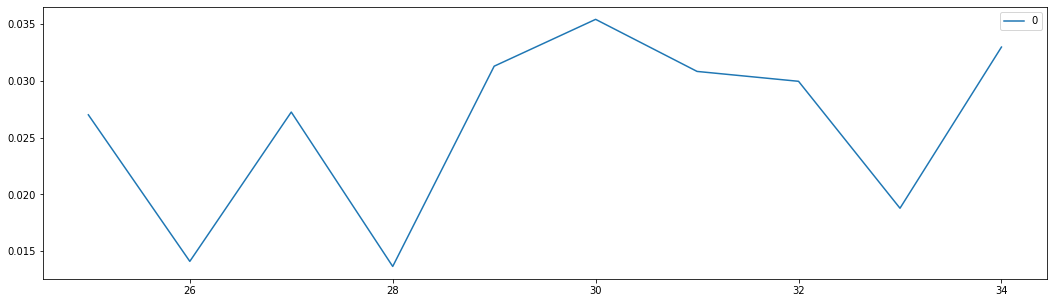

In [ ]:
df_score= pd.DataFrame(s)
df_score[25:35].plot(figsize=[18,5]) # 30 is the best no of cluster ans then #70

In [ ]:
NUM_CLUSTERS=30
kmeans = cluster.KMeans(n_clusters=NUM_CLUSTERS)
kmeans.fit(XX)

labels = kmeans.labels_
centroids = kmeans.cluster_centers_
# s[i][0]=int(i)
silhouette_score = metrics.silhouette_score(XX, labels, metric='euclidean')
s.append(silhouette_score)
assigned_clusters= labels

In [ ]:
list_0=[]
clusters_formed=[]
for j in range(30):
  print('------'*70)
  print('elements in cluster_{}'.format(j))
  print('\n')
  clust=[] 
  for i, word in enumerate(uniqueWords):
    
    if assigned_clusters[i] == j:
      clust.append(word)
      print(word + ":" + str(assigned_clusters[i]))
  clusters_formed.append(clust)  

In [ ]:
for cluster in clusters_formed:
    if len(cluster)>=2:
        print(cluster)

['quality', 'capable', 'achievement', 'level']
['sense', 'sure', 'confident', 'wise', 'smart', 'decision', 'promise', 'proud', 'able', 'umm']
['someone', 'idiot']
['integrity', 'decisiveness', 'honesty', 'honest', 'morality', 'trustworthiness', 'humility']
['politics', 'political', 'sociology', 'diplomacy']
['president', 'leader', 'leadership']
['logical', 'whole', 'crucial', 'time', 'goal', 'long', 'term', 'mature', 'care', 'hard', 'strong']
['passion', 'teamwork', 'dedication', 'commitment', 'bravery']
['empathy', 'selfless', 'kindness', 'compassion']
['work', 'progressive', 'common', 'lot', 'course', 'run', 'come', 'management', 'people', 'deliberate', 'sophisticated', 'idea', 'others', 'genuine', 'office', 'different', 'group', 'ulterior', 'relation', 'join', 'basic']
['inclusivity', 'unity', 'equality']
['peaceful', 'calm']
['understanding', 'background', 'experience', 'skill', 'knowledge']
['good', 'nice']
['agreeable', 'compromise', 'approachable']
['qualified', 'system', 'count

# word2vec + wordnet + k means clustering

In [ ]:
import nltk
from nltk.corpus import wordnet
# synonyms = []
# antonyms = []
  
# for syn in wordnet.synsets("good"):
#     for l in syn.lemmas():
#         synonyms.append(l.name())

In [ ]:
uniqueWords = [] 
for i in noun__adj:
      if not i in uniqueWords:
          uniqueWords.append(i);
len(uniqueWords)
import nltk
from nltk.corpus import wordnet
top_5_added_word=[]
for word in uniqueWords:
  top_5_added_word.append(word)
  synonyms = []
  for syn in wordnet.synsets(word):
    for l in syn.lemmas():
        synonyms.append(l.name())
  #print(synonyms)

  if len(synonyms)>5 :
    for i in range(5):
      top_5_added_word.append(synonyms[i].lower())
  else:
    for i in range(len(synonyms)):
      top_5_added_word.append(synonyms[i].lower())
  #exit()

print(len(top_5_added_word))


601


In [ ]:
top_5_added_unique_word=[]

for i in top_5_added_word:
      if not i in top_5_added_unique_word:
          top_5_added_unique_word.append(i);
len(top_5_added_unique_word)

355

In [ ]:
vocab = list(model.wv.vocab)
#print(vocab)
def intersection(lst1, lst2):
    lst3 = [value for value in lst1 if value in lst2]
    return lst3

top_5_added_unique_word=intersection(top_5_added_unique_word,vocab)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """Entry point for launching an IPython kernel.


In [ ]:
len(top_5_added_unique_word)

296

In [ ]:
from sklearn import cluster
from sklearn import metrics

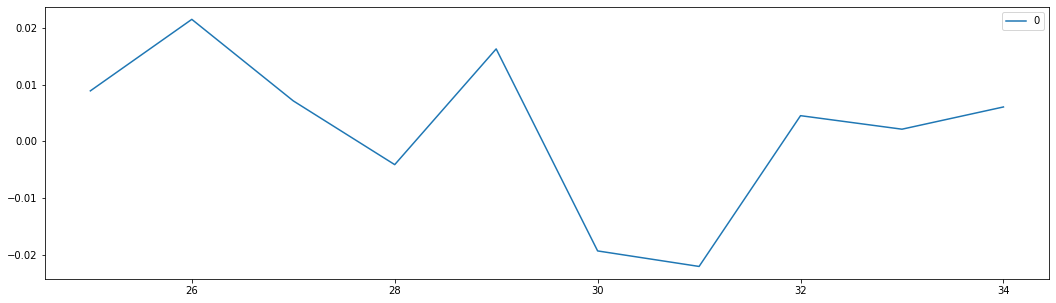

In [ ]:
from sklearn import cluster
from sklearn import metrics
s=[]
XXX= model[top_5_added_unique_word]
for i in range(2,100):
  #print(i)
  NUM_CLUSTERS=int(i)
  kmeans = cluster.KMeans(n_clusters=NUM_CLUSTERS)
  kmeans.fit(XXX)
  
  labels = kmeans.labels_
  centroids = kmeans.cluster_centers_
  # s[i][0]=int(i)
  silhouette_score = metrics.silhouette_score(XXX, labels, metric='euclidean')
  s.append(silhouette_score)

df_score= pd.DataFrame(s)
df_score[25:35].plot(figsize=[18,5])

  
  # print ("Cluster id labels for inputted data")
  # print (labels,len(labels))
  # print ("Centroids data")
  # print (centroids)
  
  # print ("Score (Opposite of the value of X on the K-means objective which is Sum of distances of samples to their closest cluster center):")
  # print (kmeans.score(XX))
  
  # silhouette_score = metrics.silhouette_score(XX, labels, metric='euclidean')
  
  # print ("Silhouette_score: ")
  # print (silhouette_score)

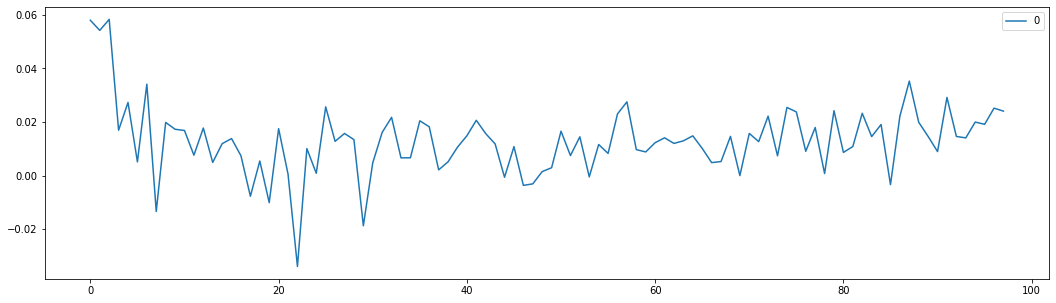

In [ ]:
df_score.plot(figsize=[18,5])

In [ ]:
from sklearn import cluster
from sklearn import metrics

In [ ]:
NUM_CLUSTERS=57
kmeans = cluster.KMeans(n_clusters=NUM_CLUSTERS)
kmeans.fit(XXX)

labels = kmeans.labels_
centroids = kmeans.cluster_centers_
# s[i][0]=int(i)
silhouette_score = metrics.silhouette_score(XXX, labels, metric='euclidean')
#s.append(silhouette_score)
assigned_clusters= labels

list_0=[]
clusters_formed=[]
for j in range(57):
  # print('------'*70)
  # print('elements in cluster_{}'.format(j))
  # print('\n')
  clust=[] 
  for i, word in enumerate(top_5_added_unique_word):
    
    if assigned_clusters[i] == j:
      clust.append(word)
      #print(word + ":" + str(assigned_clusters[i]))
  clusters_formed.append(clust)  



for cluster in clusters_formed:
    if len(cluster)>=2:
        print(cluster)  

['good', 'lofty', 'nice', 'decent']
['character', 'changeling']
['courageousness', 'fearlessness']
['imperfect', 'individual', 'passive', 'altruistic']
['finding', 'work', 'employment', 'scheme', 'appeal', 'come', 'deliver', 'grow', 'cultivated', 'see', 'job', 'care', 'acquirement', 'acquisition', 'trusty', 'underprivileged', 'accessible']
['humiliate', 'mortify', 'pity']
['positive', 'coherent', 'consistent', 'capable', 'conformable', 'mature', 'dependable', 'strong', 'potent']
['run', 'tally', 'open', 'goal', 'par']
['vast', 'huge', 'immense']
['achievement', 'accomplishment', 'attainment']
['idiot', 'imbecile', 'cretin', 'moron']
['someone', 'person', 'somebody', 'people', 'pervert']
['finality', 'warmth', 'apprehension', 'sense', 'ache', 'entreaty', 'prayer', 'theme']
['sexual_intercourse', 'intercourse']
['fluent', 'cum', 'majestic', 'born', 'consonant', 'sophisticate', 'cultured', 'preconception', 'benignity', 'echt', 'subterranean', 'motif', 'delicacy']
['progressive', 'flock', 

In [ ]:
from nltk.cluster import KMeansClusterer
import nltk
NUM_CLUSTERS=20
XXX= model[top_5_added_unique_word]
kclusterer = KMeansClusterer(NUM_CLUSTERS, distance=nltk.cluster.util.cosine_distance, repeats=25)
assigned_clusters = kclusterer.cluster(XXX, assign_clusters=True)
print(assigned_clusters)

list_0=[]
for j in range(20):
  print('------'*70)
  print('elements in cluster_{}'.format(j))
  print('\n')
  
  for i, word in enumerate(uniqueWords):
    if assigned_clusters[i] == j:
      
      print(word + ":" + str(assigned_clusters[i]))
# output: [0, 2, 1, 2, 2, 1, 2, 2, 0, 1, 0, 1, 2, 1, 2]

[1, 5, 17, 11, 5, 9, 10, 15, 5, 5, 7, 11, 5, 9, 12, 5, 2, 2, 2, 3, 5, 8, 8, 0, 10, 17, 3, 8, 1, 4, 15, 12, 12, 4, 17, 4, 11, 15, 11, 13, 12, 9, 7, 8, 14, 3, 0, 14, 13, 14, 8, 14, 8, 8, 13, 13, 13, 15, 15, 19, 4, 12, 12, 15, 3, 3, 3, 17, 17, 10, 3, 13, 5, 11, 19, 6, 1, 10, 11, 9, 14, 8, 5, 5, 17, 7, 7, 14, 9, 9, 12, 9, 10, 2, 2, 2, 18, 3, 9, 16, 13, 13, 9, 9, 18, 2, 18, 2, 18, 18, 15, 0, 14, 14, 5, 0, 9, 9, 9, 2, 0, 0, 0, 3, 11, 11, 8, 11, 5, 17, 5, 9, 17, 1, 17, 9, 13, 13, 17, 19, 17, 17, 17, 12, 10, 6, 10, 10, 10, 10, 12, 2, 15, 12, 13, 10, 12, 10, 0, 4, 17, 8, 19, 9, 3, 19, 16, 6, 15, 13, 1, 5, 12, 7, 7, 7, 1, 19, 11, 17, 15, 3, 13, 12, 17, 3, 9, 9, 9, 19, 17, 1, 19, 3, 3, 9, 2, 12, 17, 17, 17, 5, 0, 2, 5, 10, 17, 17, 16, 9, 4, 17, 17, 17, 5, 11, 8, 3, 5, 3, 12, 19, 12, 10, 2, 9, 2, 3, 10, 5, 10, 5, 5, 5, 5, 5, 0, 1, 8, 8, 13, 13, 3, 3, 17, 8, 14, 12, 3, 16, 14, 14, 14, 12, 1, 13, 1, 16, 9, 0, 13, 16, 0, 12, 1, 4, 16, 18, 18, 18, 17, 14, 8, 14, 15, 16, 16, 1, 13, 3, 3, 3, 19, 1, 3, 7